In [20]:
#normal diamond structure
#%%writefile PIT.py
import math
import meep as mp
from meep import mpb
#!rm *.h5
num_bands = 1

#k_points = [mp.Vector3(),
#            mp.Vector3(0.0  ,0.5  ,0.5  ),  #X
#            mp.Vector3(0.0  ,0.625,0.375),  #U
#            mp.Vector3(0.0  ,0.5  ,0.0  ),  #L
#            mp.Vector3(0.0  ,0.0  ,0.0  ),  #Gamma
#            mp.Vector3(0.0  ,0.5  ,0.5  ),  #X
#            mp.Vector3(0.25 ,0.75 ,0.5  ),  #W
#            mp.Vector3(0.375,0.75 ,0.375),  #K
#            mp.Vector3()]          

k_points = [mp.Vector3(),
            mp.Vector3(0.0  ,0.5  ,0.5  ),  #X
            mp.Vector3(0.5  ,0.625,0.625),  #U
            mp.Vector3(0.5  ,0.5  ,0.5  ),  #L
            mp.Vector3(0.0  ,0.0  ,0.0  ),  #Gamma
            mp.Vector3(0.0  ,0.5  ,0.5  ),  #X
            mp.Vector3(0.25 ,0.75 ,0.5  ),  #W
            mp.Vector3(0.375,0.75 ,0.375),  #K
            mp.Vector3()]  

res0 = mp.Vector3(12,20,28)
n0 = 1.5
tol = 0.001
mesh_size = 3
L = math.sqrt(3)/4
n = math.sqrt(32)
r = 0.0725
m = mp.Medium(epsilon=n*n)

geometry = [mp.Cylinder(center=mp.Vector3(0,0,0),radius=r, material=m, height=L, axis=mp.Vector3(1,1,1)),
           mp.Cylinder(center=mp.Vector3(0.5,0,0),radius=r, material=m, height=L, axis=mp.Vector3(3,-1,-1)),
           mp.Cylinder(center=mp.Vector3(0,0.5,0),radius=r, material=m, height=L, axis=mp.Vector3(-1,3,-1)),
           mp.Cylinder(center=mp.Vector3(0,0,0.5),radius=r, material=m, height=L, axis=mp.Vector3(-1,-1,3))]

a_x = math.sqrt(0.5)
geometry_lattice = mp.Lattice(
    basis_size=mp.Vector3(a_x,a_x,a_x),
    basis1=mp.Vector3(0,1,1),
    basis2=mp.Vector3(1,0,1),
    basis3=mp.Vector3(1,1,0))

#sqrt_half = math.sqrt(0.5)
#geometry_lattice = mp.Lattice(
#    basis_size=mp.Vector3(sqrt_half, sqrt_half, sqrt_half),
#    basis1=mp.Vector3(0, 1, 1),
#    basis2=mp.Vector3(1, 0, 1),
#    basis3=mp.Vector3(1, 1)
#)
k_points = mp.interpolate(1, k_points)

ms = mpb.ModeSolver(num_bands=num_bands,
                    k_points=k_points,
                    geometry=geometry,
                    geometry_lattice=geometry_lattice,
                    resolution=res0,
                    mesh_size = mesh_size)
#mpb.ModeSolver.optimize_grid_size()
ms.run()
ms.output_epsilon()

Initializing eigensolver data
Computing 1 bands with 1e-07 tolerance
     cylinder, center = (0,0,0)
          radius 0.0725, height 0.433013, axis (0.57735, 0.57735, 0.57735)
     cylinder, center = (0.5,0,0)
          radius 0.0725, height 0.433013, axis (1.73205, -0.57735, -0.57735)
     cylinder, center = (0,0.5,0)
          radius 0.0725, height 0.433013, axis (-0.57735, 1.73205, -0.57735)
     cylinder, center = (0,0,0.5)
          radius 0.0725, height 0.433013, axis (-0.57735, -0.57735, 1.73205)
17 k-points
  Vector3<0.0, 0.0, 0.0>
  Vector3<0.0, 0.25, 0.25>
  Vector3<0.0, 0.5, 0.5>
  Vector3<0.25, 0.5625, 0.5625>
  Vector3<0.5, 0.625, 0.625>
  Vector3<0.5, 0.5625, 0.5625>
  Vector3<0.5, 0.5, 0.5>
  Vector3<0.25, 0.25, 0.25>
  Vector3<0.0, 0.0, 0.0>
  Vector3<0.0, 0.25, 0.25>
  Vector3<0.0, 0.5, 0.5>
  Vector3<0.125, 0.625, 0.5>
  Vector3<0.25, 0.75, 0.5>
  Vector3<0.3125, 0.75, 0.4375>
  Vector3<0.375, 0.75, 0.375>
  Vector3<0.1875, 0.375, 0.1875>
  Vector3<0.0, 0.0, 0.0>
elap

In [ ]:
ms.band_range_data

In [ ]:
!rm PI.dat
!python PIT.py >& PI.out
!grep freqs PI.out >> PI.dat

In [ ]:
!rm *.h5
!rm *.vtk
!python PIT.py 
!h5tovtk PIT-epsilon.h5

In [ ]:
import csv
import numpy as np
import matplotlib.pyplot as plt
num_bands=3
nip_raw = []
k_raw = []
omega_raw = []

with open('PI.dat') as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=',')
    line_count = 0
    next(csv_file)
    for row in csv_reader:
        nip_raw.append(row[1])
        k_raw.append(row[2:5])
        omega_raw.append(row[6:num_bands+6])
        

In [ ]:
N=np.size(nip_raw)
nip=np.zeros((N))
k=np.zeros((N,3))
omega=np.zeros((N,num_bands))
for i in range(0,N):
    nip[i] = float(nip_raw[i])
    for j in range(0,3):
        k[i][j] = float(k_raw[i][j])
        
    for j in range(0,num_bands):
        omega[i][j] = float(omega_raw[i][j])

plt.plot(nip,omega[:,:])

In [3]:
%%writefile PIT.py
import math
import meep as mp
from meep import mpb
num_bands = 10
ax = math.sqrt(2)/2.0
ay = math.sqrt(6)/2.0
az = math.sqrt(3)
L = math.sqrt(3)/4.0
hs = math.sqrt(3)/12.0
na = 1
r = 0.0725
geometry_lattice = mp.Lattice(size=mp.Vector3(na,na,na),
                              basis_size=mp.Vector3(ax,ay,az))
#v1 = mp.Vector3(1)

v2 = mp.Vector3(0.5,0.5,0)
v1 = mp.Vector3(0,1.0/3.0,1.0/3.0)
v5 = mp.Vector3(0.5,5.0/6.0,1.0/3.0)
v3 = mp.Vector3(0.5,1.0/6.0,2.0/3.0)
v4 = mp.Vector3(0,2.0/3.0,2.0/3.0)
res0 = mp.Vector3(12,20,28)
n0 = 1.5
mesh_size = 3
n = math.sqrt(32)
r = 0.0725
m = mp.Medium(epsilon=n*n)
c1 = mp.Vector3(0,-math.sqrt(6)/12/ay,-hs/2/az)
c2 = mp.Vector3(math.sqrt(2)/8/ax,math.sqrt(6)/24/ay,-hs/2/az)
c3 = mp.Vector3(-math.sqrt(2)/8/ax,math.sqrt(6)/24/ay,-hs/2/az)
c4 = mp.Vector3(0,0,L/2/az)
geometry = [mp.Cylinder(center=c1,radius=r, material=m, height=L, axis=c1),
            mp.Cylinder(center=c2,radius=r, material=m, height=L, axis=c2),
            mp.Cylinder(center=c3,radius=r, material=m, height=L, axis=c3),
            mp.Cylinder(center=c4,radius=r, material=m, height=L, axis=c4),
            mp.Cylinder(center=c1+v1,radius=r, material=m, height=L, axis=c1),
            mp.Cylinder(center=c2+v1,radius=r, material=m, height=L, axis=c2),
            mp.Cylinder(center=c3+v1,radius=r, material=m, height=L, axis=c3),
            mp.Cylinder(center=c4+v1,radius=r, material=m, height=L, axis=c4),
            mp.Cylinder(center=c1+v2,radius=r, material=m, height=L, axis=c1),
            mp.Cylinder(center=c2+v2,radius=r, material=m, height=L, axis=c2),
            mp.Cylinder(center=c3+v2,radius=r, material=m, height=L, axis=c3),
            mp.Cylinder(center=c4+v2,radius=r, material=m, height=L, axis=c4),
            mp.Cylinder(center=c1+v3,radius=r, material=m, height=L, axis=c1),
            mp.Cylinder(center=c2+v3,radius=r, material=m, height=L, axis=c2),
            mp.Cylinder(center=c3+v3,radius=r, material=m, height=L, axis=c3),
            mp.Cylinder(center=c4+v3,radius=r, material=m, height=L, axis=c4),
            mp.Cylinder(center=c1+v4,radius=r, material=m, height=L, axis=c1),
            mp.Cylinder(center=c2+v4,radius=r, material=m, height=L, axis=c2),
            mp.Cylinder(center=c3+v4,radius=r, material=m, height=L, axis=c3),
            mp.Cylinder(center=c4+v4,radius=r, material=m, height=L, axis=c4),
            mp.Cylinder(center=c1+v5,radius=r, material=m, height=L, axis=c1),
            mp.Cylinder(center=c2+v5,radius=r, material=m, height=L, axis=c2),
            mp.Cylinder(center=c3+v5,radius=r, material=m, height=L, axis=c3),
            mp.Cylinder(center=c4+v5,radius=r, material=m, height=L, axis=c4)]

#geometry2 = mp.geometric_objects_duplicates(v1,1,1,geometry_unit)
#geometry3 = mp.geometric_objects_duplicates(mp.Vector3(0,math.sqrt(6)/2/ay,0),1,1,geometry_unit)
#geometry4 = mp.geometric_objects_duplicates(v3,1,1,geometry_unit)
#geometry5 = mp.geometric_objects_duplicates(v3,1,1,geometry2)
#geometry6 = mp.geometric_objects_duplicates(v2,1,1,geometry4)
geometry = mp.geometric_objects_lattice_duplicates(geometry_lattice, geometry)

#k_points = [mp.Vector3(),
#            mp.Vector3(0,0.5),
#            mp.Vector3(0.5,0.5),
#            mp.Vector3(),
#            mp.Vector3(0,0.5),
#            mp.Vector3(0.5,0.5,0.5),
#            mp.Vector3()]          # Gamma
#k_points = mp.interpolate(4, k_points)
k_points = [mp.Vector3()]
ms = mpb.ModeSolver(num_bands=num_bands,
                    k_points=k_points,
                    geometry=geometry,
                    geometry_lattice=geometry_lattice,
                    resolution=2*res0,
                    mesh_size = mesh_size)
ms.geometry = ms.geometry.append([mp.Cylinder(center=c1,radius=r, material=mp.air, height=L, axis=c1)])
#mpb.ModeSolver.optimize_grid_size()
ms.run()
ms.output_epsilon()
#!h5tovtk epsilon.h5

Overwriting PIT.py


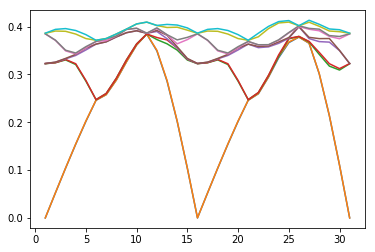

In [11]:
#!python PIT.py >& PI.out
#!rm PI.dat
#!rm *.h5
!grep freqs PI.out >> PI.dat

import csv
import numpy as np
import matplotlib.pyplot as plt
num_bands=10
nip_raw = []
k_raw = []
omega_raw = []

with open('PI.dat') as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=',')
    line_count = 0
    next(csv_file)
    for row in csv_reader:
        nip_raw.append(row[1])
        k_raw.append(row[2:5])
        omega_raw.append(row[6:num_bands+6])
        
N=np.size(nip_raw)
nip=np.zeros((N))
k=np.zeros((N,3))
omega=np.zeros((N,num_bands))
for i in range(0,N):
    nip[i] = float(nip_raw[i])
    for j in range(0,3):
        k[i][j] = float(k_raw[i][j])
        
    for j in range(0,num_bands):
        omega[i][j] = float(omega_raw[i][j])

plt.plot(nip,omega[:,:])

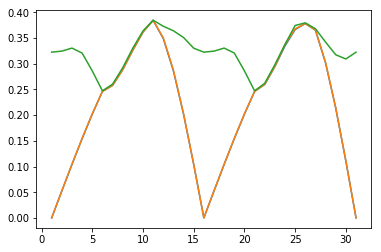

In [7]:
plt.plot(nip,omega[:,:])

In [ ]:
!python PIT.py 
!h5tovtk PIT-epsilon.h5

In [21]:
mp.Vector3(1)+mp.Vector3(0,1)

Vector3<1.0, 1.0, 0.0>